In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
# base = Path('/Users/jasonkuruzovich/Library/CloudStorage/Box-Box/Documents/0_research/eship_vitor/I_CORPS/data/2024_617/NSF-Downloads-8july2024/')
base = Path('../Data')


df = pd.read_csv(base/'long_NSF_grants_2.csv')

/var/folders/51/gj2tp9pn4klb16gg85jd62zc0000gn/T/ipykernel_2563/2129209657.py:5: DtypeWarning: Columns (0,2,3,4,5,6,8,9,10,11,12,14,15,18,20,21,22,23,24,25,27,28,29,30,31,34,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base/'long_NSF_grants_2.csv')


In [3]:
df.head()

,AwardID,InvestigatorNumber,AwardInstrument,Institution_OrgLglBusName,TRAN_TYPE,ProgramOfficer_Name,Institution_Zip,AwardEffectiveDate,Institution_Country,Performance_Institution_State,Institution_StreetAddress2,Institution_City,Performance_Institution_StreetAddress,AwardTitle,Performance_Institution_CongressDistrictPerf,AbstractNarration,Organization_Code,Institution_Name,Performance_Institution_City,Institution_State,Institution_OrgUEINum,Performance_Institution_CountryCode,Institution_CongressDistrictOrg,MaxAmdLetterDate,Performance_Institution_Zip,Performance_Institution_Name,AwardTotalIntnAmount,Directorate_LongName,Performance_Institution_Country,Year,Institution_StreetAddress1,ProgramElement1_Text,AwardAmount,AwardExpirationDate,Division_LongName,MinAmdLetterDate,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode
0,1341657,1,Standard Grant,THE TRUSTEES OF COLUMBIA UNIVERSITY IN THE CIT...,Grant,Peter Milne,100277922,4/1/2014,United States,New York,MC 8741,NEW YORK,61 Rte 9W,Stratospheric Ozone Depletion and Recovery and...,NY17,"Climate change in the Antarctic, along with it...",6090300.0,Columbia University,Palisades,New York,F4N1QNPB95M4,US,NY13,4/3/2014,109641707,Lamont-Doherty Earth Observatory of Columbia U...,629920.0,Directorate For Geosciences,United States,2013,615 W 131ST ST,ANT Ocean & Atmos Sciences,629920.0,3/31/2017,Office of Polar Programs (OPP),4/3/2014,Lorenzo,Polvani,M,NaN,Lorenzo M Polvani,lmp@columbia.edu,90165.0,4/3/2014,NaN,Co-Principal Investigator
1,1339934,1,Standard Grant,BOARD OF REGENTS OF THE NEVADA SYSTEM OF HIGHE...,Grant,Elizabeth Blood,895570001,6/1/2014,United States,Nevada,NaN,RENO,1664 N VIRGINIA ST,Collaborative Research: Extreme Events and Eco...,NV02,Forests are vital natural and economic resourc...,8040000.0,"Board of Regents, NSHE, obo University of Neva...",RENO,Nevada,WLDGTNCFFJZ3,US,NV02,2/1/2016,895570001,University of Nevada Reno,92385.0,Direct For Biological Sciences,United States,2013,1664 N VIRGINIA ST # 285,MacroSysBIO & NEON-Enabled Sci,106185.0,5/31/2017,Emerging Frontiers,5/14/2014,Franco,Biondi,NaN,NaN,Franco Biondi,franco.biondi@gmail.com,485992.0,5/14/2014,NaN,Principal Investigator
2,1318722,1,Standard Grant,REGENTS OF THE UNIVERSITY OF MICHIGAN,Grant,Fen Zhao,481091079,9/1/2013,United States,Michigan,NaN,ANN ARBOR,2260 Hayward Street,TWC: Small: Discovering and Restricting Undesi...,MI06,Loss of personal data or leakage of corporate ...,5050000.0,Regents of the University of Michigan - Ann Arbor,ANN ARBOR,Michigan,GNJ7BBP73WE9,US,MI06,8/19/2013,481092121,University of Michigan Ann Arbor,488744.0,Direct For Computer & Info Scie & Enginr,United States,2013,"1109 GEDDES AVE, SUITE 3300",Secure &Trustworthy Cyberspace,488744.0,8/31/2017,Division Of Computer and Network Systems,8/19/2013,Atul,Prakash,NaN,NaN,Atul Prakash,aprakash@umich.edu,217717.0,8/19/2013,NaN,Principal Investigator
3,1317411,1,Standard Grant,REGENTS OF THE UNIVERSITY OF MICHIGAN,Grant,Alexander Sprintson,481091079,10/1/2013,United States,Michigan,NaN,ANN ARBOR,2260 Hayward Street,NeTS: Small: Collaborative Research: Efficient...,MI06,Next-generation WLAN protocols will rely heavi...,5050000.0,Regents of the University of Michigan - Ann Arbor,ANN ARBOR,Michigan,GNJ7BBP73WE9,US,MI06,8/19/2013,481092121,University of Michigan Ann Arbor,222947.0,Direct For Computer & Info Scie & Enginr,United States,2013,"1109 GEDDES AVE, SUITE 3300",Networking Technology and Syst,222947.0,9/30/2018,Division Of Computer and Network Systems,8/19/2013,Kang,Shin,G,NaN,Kang G Shin,kgshin@umich.edu,435838.0,8/19/2013,NaN,Principal Investigator
4,1347226,1,Continuing Grant,REGENTS OF THE UNIVERSITY OF MINNESOTA,Grant,Pamela McCauley,554552009,6/15/2014,United States,Minnesota,NaN,MINNEAPOLIS,117 Pleasant Street SE,Minnesota I-Corps Site (MIN-Corps): Catalyzing.

In [4]:
df.columns

Index(['AwardID', 'InvestigatorNumber', 'AwardInstrument',
       'Institution_OrgLglBusName', 'TRAN_TYPE', 'ProgramOfficer_Name',
       'Institution_Zip', 'AwardEffectiveDate', 'Institution_Country',
       'Performance_Institution_State', 'Institution_StreetAddress2',
       'Institution_City', 'Performance_Institution_StreetAddress',
       'AwardTitle', 'Performance_Institution_CongressDistrictPerf',
       'AbstractNarration', 'Organization_Code', 'Institution_Name',
       'Performance_Institution_City', 'Institution_State',
       'Institution_OrgUEINum', 'Performance_Institution_CountryCode',
       'Institution_CongressDistrictOrg', 'MaxAmdLetterDate',
       'Performance_Institution_Zip', 'Performance_Institution_Name',
       'AwardTotalIntnAmount', 'Directorate_LongName',
       'Performance_Institution_Country', 'Year', 'Institution_StreetAddress1',
       'ProgramElement1_Text', 'AwardAmount', 'AwardExpirationDate',
       'Division_LongName', 'MinAmdLetterDate', 'Invest

In [5]:
print(df.isnull().sum())

AwardID                                               0
InvestigatorNumber                                    0
AwardInstrument                                  334872
Institution_OrgLglBusName                        521637
TRAN_TYPE                                        431766
ProgramOfficer_Name                              348267
Institution_Zip                                  338037
AwardEffectiveDate                                    0
Institution_Country                              335901
Performance_Institution_State                    813120
Institution_StreetAddress2                      1772529
Institution_City                                 335934
Performance_Institution_StreetAddress            946266
AwardTitle                                        61647
Performance_Institution_CongressDistrictPerf     440130
AbstractNarration                                668565
Organization_Code                                334977
Institution_Name                                

In [6]:
# Convert Investigator_NSFID to integer
df['Investigator_NSFID'] = pd.to_numeric(df['Investigator_NSFID'], errors='coerce').astype('Int64')

In [7]:
# Get the count of each unique Investigator_NSFID value
nsfid_counts = df['Investigator_NSFID'].value_counts()

print("Count of each unique Investigator_NSFID value:")
nsfid_counts

Count of each unique Investigator_NSFID value:


525500    457
206836    302
175214    193
109156    183
234145    183
         ... 
810269      1
818586      1
347181      1
605608      1
175120      1
Name: Investigator_NSFID, Length: 220933, dtype: Int64

In [9]:
# Filter the DataFrame to get all records where Investigator_NSFID equals '0.0'
nsf_id_zero_df = df[df['Investigator_NSFID'] == 0.0]

print("Records where Investigator_NSFID is 0.0:")
nsf_id_zero_df

Records where Investigator_NSFID is 0.0:


,AwardID,InvestigatorNumber,AwardInstrument,Institution_OrgLglBusName,TRAN_TYPE,ProgramOfficer_Name,Institution_Zip,AwardEffectiveDate,Institution_Country,Performance_Institution_State,Institution_StreetAddress2,Institution_City,Performance_Institution_StreetAddress,AwardTitle,Performance_Institution_CongressDistrictPerf,AbstractNarration,Organization_Code,Institution_Name,Performance_Institution_City,Institution_State,Institution_OrgUEINum,Performance_Institution_CountryCode,Institution_CongressDistrictOrg,MaxAmdLetterDate,Performance_Institution_Zip,Performance_Institution_Name,AwardTotalIntnAmount,Directorate_LongName,Performance_Institution_Country,Year,Institution_StreetAddress1,ProgramElement1_Text,AwardAmount,AwardExpirationDate,Division_LongName,MinAmdLetterDate,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode
14944,1433832,1,Standard Grant,UNIVERSITY OF CHICAGO,Grant,Janice Cuny,606375418,4/1/2014,United States,Illinois,NaN,CHICAGO,NaN,EAGER: Leading Computer Science Growth: A Tool...,IL01,The University of Chicago proposes a project t...,5050000.0,University of Chicago,NaN,Illinois,ZUE9HKT2CLC9,US,IL01,5/21/2014,606372801,University of Chicago,249843.0,Direct For Computer & Info Scie & Enginr,United States,2014,5801 S ELLIS AVE,Computing Ed for 21st Century,249843.0,12/31/2015,Division Of Computer and Network Systems,4/10/2014,Michael,Lach,NaN,NaN,Michael Lach,NaN,0,5/21/2014,NaN,Co-Principal Investigator
49265,1500055,1,Standard Grant,MINNESOTA STATE COLLEGES & UNIVERSITIES,Grant,Victor Piotrowski,551065003,9/1/2015,United States,Minnesota,NaN,SAINT PAUL,700 E 7th Street,SaTC-EDU: EAGER: CFEAR: Cyber Forensics Educat...,MN04,Creative educational and research programs nee...,11010001.0,Metropolitan State University,St.Paul,Minnesota,RPHKMZZNJN93,US,MN04,6/17/2019,551065000,Metropolitan State University,299943.0,Directorate for STEM Education,United States,2015,700 7TH ST E,Secure &Trustworthy Cyberspace,299943.0,8/31/2020,Division Of Graduate Education,8/21/2015,Suzanne,Fitzgerald,C,NaN,Suzanne C Fitzgerald,NaN,0,8/21/2015,NaN,Co-Principal Investigator
443906,1118708,1,Intergovernmental Personnel Award,PEPPERDINE UNIVERSITY,Grant,GARY E SCAVONGELLI,902634819,1/10/2011,United States,California,NaN,MALIBU,24255 PACIFIC COAST HWY,Intergovernmental Mobility Assignment,CA33,NaN,2000000.0,Pepperdine University,MALIBU,California,NaN,US,CA33,8/22/2012,902634819,Pepperdine University,69936.0,Office Of Information & Resource Mgmt,United States,2011,24255 PACIFIC COAST HWY,"IPAs, NSF ACADEMY",177682.0,12/14/2012,Office Of Information & Resource Mgmt,1/13/2011,Douglas,Leigh,NaN,NaN,Douglas Leigh,NaN,0,1/13/2011,NaN,Principal Investigator
617845,343399,1,Fellowship Award,NaN,Grant,Gisele Muller-Parker,NaN,9/1/2003,United Kingdom,NaN,NaN,Oxford OX1 2JD UK,NaN,GRADUATE RESEARCH FELLOWSHIPS,NaN,NaN,11010101.0,"Giansiracusa, Jeffrey H",Oxford OX1 2JD UK,NaN,NaN,UK,NaN,8/26/2005,NaN,"Giansiracusa, Jeffrey H",39000.0,Direct For Education and Human Resources,United Kingdom,2003,NaN,Graduate Research Fellowship,117359.0,8/31/2008,Division Of Graduate Education,9/6/2003,Jeffrey,Giansiracusa,H,NaN,Jeffrey H Giansiracusa,NaN,0,9/6/2003,NaN,Principal Investigator
863390,928669,2,Standard Grant,UNIVERSITY OF ILLINOIS,Grant,David B. Campbell,606124305,7/1/2009,United States,Illinois,NaN,CHICAGO,809 S MARSHFIELD AVE M/C 551,Chicago Transformation Teacher Institutes,IL07,The Chicago Transformation Teacher Institutes ...,11090000.0,University of Illinois at Chicago,CHICAGO,Illinois,W8XEAJDKMXH3,US,IL07,2/27/2014,606124305,University of Illinois at Chicago,4994911.0,Directorate for STEM Education,United States,2009,809 S MARSHFIELD AVE M/C 551,MSP-TEACHER INSTITUTES,4994911.0,9/30/2015,Division Of Research On Learning,5/28/2009,Michael,Lach,NaN,NaN,Michael Lach,NaN,0,5/28/2009,5/27

In [10]:
nsf_id_zero_df = df[df['Investigator_NSFID'] == 175214]

print("Records where Investigator_NSFID is 175214:")
nsf_id_zero_df

Records where Investigator_NSFID is 175214:


,AwardID,InvestigatorNumber,AwardInstrument,Institution_OrgLglBusName,TRAN_TYPE,ProgramOfficer_Name,Institution_Zip,AwardEffectiveDate,Institution_Country,Performance_Institution_State,Institution_StreetAddress2,Institution_City,Performance_Institution_StreetAddress,AwardTitle,Performance_Institution_CongressDistrictPerf,AbstractNarration,Organization_Code,Institution_Name,Performance_Institution_City,Institution_State,Institution_OrgUEINum,Performance_Institution_CountryCode,Institution_CongressDistrictOrg,MaxAmdLetterDate,Performance_Institution_Zip,Performance_Institution_Name,AwardTotalIntnAmount,Directorate_LongName,Performance_Institution_Country,Year,Institution_StreetAddress1,ProgramElement1_Text,AwardAmount,AwardExpirationDate,Division_LongName,MinAmdLetterDate,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode
176932,809128,1,Fellowship Award,RECTOR & VISITORS OF THE UNIVERSITY OF VIRGINIA,Grant,Gisele Muller-Parker,229034833,12/1/2007,United States,Virginia,NaN,CHARLOTTESVILLE,1001 EMMET ST N,Graduate Research Fellowship Program,VA05,NaN,11010101.0,University of Virginia Main Campus,CHARLOTTESVILLE,Virginia,JJG6HU8PA4S5,US,VA05,8/5/2012,229034833,University of Virginia Main Campus,405500.0,Directorate for STEM Education,United States,2008,1001 EMMET ST N,Graduate Research Fellowship,3049750.0,11/30/2013,Division Of Graduate Education,12/17/2007,None,None,NaN,NaN,None None,NaN,175214,12/17/2007,NaN,Former Principal Investigator
178397,822220,1,Fellowship Award,VIRGINIA POLYTECHNIC INSTITUTE & STATE UNIVERSITY,Grant,Gisele Muller-Parker,240603359,2/1/2008,United States,Virginia,STE 4200,BLACKSBURG,300 TURNER ST NW,Graduate Research Fellowship Program,VA09,NaN,11010101.0,Virginia Polytechnic Institute and State Unive...,BLACKSBURG,Virginia,QDE5UHE5XD16,US,VA09,7/28/2012,240603359,Virginia Polytechnic Institute and State Unive...,603791.0,Direct For Education and Human Resources,United States,2008,300 TURNER ST NW,NaN,2527833.0,1/31/2013,Division Of Graduate Education,2/13/2008,None,None,NaN,NaN,None None,NaN,175214,2/13/2008,NaN,Former Principal Investigator
179229,802871,1,Fellowship Award,TRUSTEES OF DARTMOUTH COLLEGE,Grant,Gisele Muller-Parker,37552170,11/1/2007,United States,New Hampshire,NaN,HANOVER,7 LEBANON ST,Graduate Research Fellowship Program,NH02,NaN,11010101.0,Dartmouth College,HANOVER,New Hampshire,EB8ASJBCFER9,US,NH02,7/20/2012,37552170,Dartmouth College,0.0,Directorate for STEM Education,United States,2008,7 LEBANON ST,Graduate Research Fellowship,1345750.0,10/31/2012,Division Of Graduate Education,10/26/2007,None,None,NaN,NaN,None None,NaN,175214,10/26/2007,NaN,Former Principal Investigator
179548,829517,1,Fellowship Award,UNIVERSITY OF OREGON,Grant,Gisele Muller-Parker,974031905,3/15/2008,United States,Oregon,NaN,EUGENE,1776 E 13TH AVE,Graduate Research Fellowship Program,OR04,NaN,11010101.0,University of Oregon Eugene,EUGENE,Oregon,Z3FGN9MF92U2,US,OR04,7/24/2012,974031905,University of Oregon Eugene,66000.0,Directorate for STEM Education,United States,2008,1776 E 13TH AVE,Graduate Research Fellowship,1575500.0,2/28/2013,Division Of Graduate Education,3/21/2008,None,None,NaN,NaN,None None,NaN,175214,3/21/2008,NaN,Former Principal Investigator
182361,833371,1,Fellowship Award,RESEARCH FOUNDATION FOR THE STATE UNIVERSITY O...,Grant,Gisele Muller-Parker,117940001,5/1/2008,United States,New York,NaN,STONY BROOK,W5510 FRANKS MELVILLE MEMORIAL L,Graduate Research Fellowship Program,NY01,NaN,11010101.0,SUNY at Stony Brook,STONY BROOK,New York,M746VC6XMNH9,US,NY01,8/12/2012,117940001,SUNY at Stony Brook,97093.0,Directorate for STEM Education,United States,2008,W5510 FRANKS MELVILLE MEMORIAL L,Graduate Research Fellowship,1496211.0,4/30/2013,Division Of Graduate Education,5/6/2008,None,None,NaN,NaN,None None,NaN,175214,5/6/2008,NaN,Former Princip

### should i drop such records where name is none?

In [11]:
nsf_id_zero_df = df[df['Investigator_NSFID'] == 206836]

print("Records where Investigator_NSFID is 206836:")
nsf_id_zero_df

Records where Investigator_NSFID is 206836:


,AwardID,InvestigatorNumber,AwardInstrument,Institution_OrgLglBusName,TRAN_TYPE,ProgramOfficer_Name,Institution_Zip,AwardEffectiveDate,Institution_Country,Performance_Institution_State,Institution_StreetAddress2,Institution_City,Performance_Institution_StreetAddress,AwardTitle,Performance_Institution_CongressDistrictPerf,AbstractNarration,Organization_Code,Institution_Name,Performance_Institution_City,Institution_State,Institution_OrgUEINum,Performance_Institution_CountryCode,Institution_CongressDistrictOrg,MaxAmdLetterDate,Performance_Institution_Zip,Performance_Institution_Name,AwardTotalIntnAmount,Directorate_LongName,Performance_Institution_Country,Year,Institution_StreetAddress1,ProgramElement1_Text,AwardAmount,AwardExpirationDate,Division_LongName,MinAmdLetterDate,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode
7712,1338919,1,Standard Grant,GORDON RESEARCH CONFERENCES,Grant,Krastan Blagoev,28183454,6/1/2013,United States,Rhode Island,NaN,EAST GREENWICH,512 Liberty Lane,2013 Biological Mechanisms in Evolution: Basi...,RI02,The Gordon Research Conference on Biological M...,3010000.0,Gordon Research Conferences,West Kingston,Rhode Island,XL5ANMKWN557,US,RI02,5/17/2013,28931501,Gordon Research Conferences,20000.0,Direct For Mathematical & Physical Scien,United States,2013,5586 POST RD UNIT 2,PHYSICS OF LIVING SYSTEMS,20000.0,11/30/2013,Division Of Physics,5/17/2013,Nancy,Gray,R,NaN,Nancy R Gray,nsf@grc.org,206836,5/17/2013,NaN,Co-Principal Investigator
10075,1340546,1,Standard Grant,GORDON RESEARCH CONFERENCES,Grant,Kamal Shukla,28183454,8/1/2013,United States,Rhode Island,NaN,EAST GREENWICH,512 Liberty Lane,Conference: GRC Protein Folding Dynamics: From...,RI02,Intellectual Merit:<br/>The Gordon Research Co...,8070400.0,Gordon Research Conferences,West Kingston,Rhode Island,XL5ANMKWN557,US,RI02,7/26/2013,28921502,Gordon Research Conferences,20400.0,Direct For Biological Sciences,United States,2013,5586 POST RD UNIT 2,Molecular Biophysics,20400.0,7/31/2014,Div Of Molecular and Cellular Bioscience,7/26/2013,Nancy,Gray,R,NaN,Nancy R Gray,nsf@grc.org,206836,7/26/2013,NaN,Co-Principal Investigator
68048,1206628,1,Standard Grant,GORDON RESEARCH CONFERENCES,Grant,Daniele Finotello,28183454,1/15/2012,United States,Rhode Island,NaN,EAST GREENWICH,512 Liberty Lane,"2012 High Pressure, Research at GRC/GRS; GRS: ...",RI02,NSF funds will be used to support (registratio...,3070000.0,Gordon Research Conferences,West Kingston,Rhode Island,XL5ANMKWN557,US,RI02,1/10/2012,28921501,Gordon Research Conferences,10000.0,Direct For Mathematical & Physical Scien,United States,2012,5586 POST RD UNIT 2,CONDENSED MATTER PHYSICS,10000.0,12/31/2012,Division Of Materials Research,1/10/2012,Nancy,Gray,R,NaN,Nancy R Gray,nsf@grc.org,206836,1/10/2012,NaN,Co-Principal Investigator
68385,1216412,1,Standard Grant,GORDON RESEARCH CONFERENCES,Grant,Z. Ying,28183454,5/15/2012,United States,Rhode Island,NaN,EAST GREENWICH,512 Liberty Lane,2012 Defects in Semiconductors Gordon Research...,RI02,This grant provides partial support for Gordon...,3070000.0,Gordon Research Conferences,West Kingston,Rhode Island,XL5ANMKWN557,US,RI02,1/30/2012,28921502,Gordon Research Conferences,5000.0,Direct For Mathematical & Physical Scien,United States,2012,5586 POST RD UNIT 2,ELECTRONIC/PHOTONIC MATERIALS,5000.0,4/30/2013,Division Of Materials Research,1/30/2012,Nancy,Gray,R,NaN,Nancy R Gray,nsf@grc.org,206836,1/30/2012,NaN,Co-Principal Investigator
69315,1228689,1,Standard Grant,GORDON RESEARCH CONFERENCES,Grant,David A. Brant,28183454,4/1/2012,United States,Rhode Island,NaN,EAST GREENWICH,NaN,2012 Biomineralization GRC/GRS,RI02,ID: MPS/DMR/BMAT(7623) 1228689 PI: ...,3070000.0,Gordon Research Conferences,NaN,Rhode Island,XL5ANMKWN557,US,RI02,3/7/2012,28921502,Gordon Research Conferences,8800.0,Direct For Mathematic

### convert nsfid into int
## each unique nsfid and name (pair) consistent for diff (should not match for different people)

## drop historical data
### lowercase every full name before comparing


## column: ProgramElement1_Text
## 

In [8]:
# Drop historical data
df = df[df['Year'] != 'Historical']

In [9]:
# Convert FullName to lowercase for comparison
df['FullName'] = df['Investigator_FullName'].str.lower()

In [10]:
# Check if each unique Investigator_NSFID is consistent with FullName
nsfid_name_consistency = df.groupby('Investigator_NSFID')['FullName'].nunique()
inconsistent_nsfid = nsfid_name_consistency[nsfid_name_consistency > 1]
print("\nNSFIDs with Inconsistent FullName:")
inconsistent_nsfid


NSFIDs with Inconsistent FullName:


Investigator_NSFID
0          4
1         19
2         17
113494     2
177608     2
193207     2
193593     2
201205     2
204081     2
205110     2
213960     2
259449     2
269298     2
308028     2
308821     2
345146     2
360450     2
466931     2
475784     2
476059     2
488244     2
489591     2
492839     2
494078     2
514101     2
526221     2
598117     2
611902     2
653012     2
670631     2
677210     2
707814     2
728461     2
785529     2
807609     2
Name: FullName, dtype: int64

In [11]:
inconsistent_nsfid_size = len(inconsistent_nsfid)
print(f"Size of inconsistent_nsfid: {inconsistent_nsfid_size}")

Size of inconsistent_nsfid: 35


In [12]:
# Drop rows with inconsistent NSFIDs
consistent_df = df[~df['Investigator_NSFID'].isin(inconsistent_nsfid.index)]

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
consistent_df.head()


Cleaned DataFrame:


,AwardID,InvestigatorNumber,AwardInstrument,Institution_OrgLglBusName,TRAN_TYPE,ProgramOfficer_Name,Institution_Zip,AwardEffectiveDate,Institution_Country,Performance_Institution_State,Institution_StreetAddress2,Institution_City,Performance_Institution_StreetAddress,AwardTitle,Performance_Institution_CongressDistrictPerf,AbstractNarration,Organization_Code,Institution_Name,Performance_Institution_City,Institution_State,Institution_OrgUEINum,Performance_Institution_CountryCode,Institution_CongressDistrictOrg,MaxAmdLetterDate,Performance_Institution_Zip,Performance_Institution_Name,AwardTotalIntnAmount,Directorate_LongName,Performance_Institution_Country,Year,Institution_StreetAddress1,ProgramElement1_Text,AwardAmount,AwardExpirationDate,Division_LongName,MinAmdLetterDate,Investigator_FirstName,Investigator_LastName,Investigator_MiddleInitial,Investigator_Suffix,Investigator_FullName,Investigator_Email,Investigator_NSFID,Investigator_StartDate,Investigator_EndDate,Investigator_RoleCode,FullName
0,1341657,1,Standard Grant,THE TRUSTEES OF COLUMBIA UNIVERSITY IN THE CIT...,Grant,Peter Milne,100277922,4/1/2014,United States,New York,MC 8741,NEW YORK,61 Rte 9W,Stratospheric Ozone Depletion and Recovery and...,NY17,"Climate change in the Antarctic, along with it...",6090300.0,Columbia University,Palisades,New York,F4N1QNPB95M4,US,NY13,4/3/2014,109641707,Lamont-Doherty Earth Observatory of Columbia U...,629920.0,Directorate For Geosciences,United States,2013,615 W 131ST ST,ANT Ocean & Atmos Sciences,629920.0,3/31/2017,Office of Polar Programs (OPP),4/3/2014,Lorenzo,Polvani,M,NaN,Lorenzo M Polvani,lmp@columbia.edu,90165,4/3/2014,NaN,Co-Principal Investigator,lorenzo m polvani
1,1339934,1,Standard Grant,BOARD OF REGENTS OF THE NEVADA SYSTEM OF HIGHE...,Grant,Elizabeth Blood,895570001,6/1/2014,United States,Nevada,NaN,RENO,1664 N VIRGINIA ST,Collaborative Research: Extreme Events and Eco...,NV02,Forests are vital natural and economic resourc...,8040000.0,"Board of Regents, NSHE, obo University of Neva...",RENO,Nevada,WLDGTNCFFJZ3,US,NV02,2/1/2016,895570001,University of Nevada Reno,92385.0,Direct For Biological Sciences,United States,2013,1664 N VIRGINIA ST # 285,MacroSysBIO & NEON-Enabled Sci,106185.0,5/31/2017,Emerging Frontiers,5/14/2014,Franco,Biondi,NaN,NaN,Franco Biondi,franco.biondi@gmail.com,485992,5/14/2014,NaN,Principal Investigator,franco biondi
2,1318722,1,Standard Grant,REGENTS OF THE UNIVERSITY OF MICHIGAN,Grant,Fen Zhao,481091079,9/1/2013,United States,Michigan,NaN,ANN ARBOR,2260 Hayward Street,TWC: Small: Discovering and Restricting Undesi...,MI06,Loss of personal data or leakage of corporate ...,5050000.0,Regents of the University of Michigan - Ann Arbor,ANN ARBOR,Michigan,GNJ7BBP73WE9,US,MI06,8/19/2013,481092121,University of Michigan Ann Arbor,488744.0,Direct For Computer & Info Scie & Enginr,United States,2013,"1109 GEDDES AVE, SUITE 3300",Secure &Trustworthy Cyberspace,488744.0,8/31/2017,Division Of Computer and Network Systems,8/19/2013,Atul,Prakash,NaN,NaN,Atul Prakash,aprakash@umich.edu,217717,8/19/2013,NaN,Principal Investigator,atul prakash
3,1317411,1,Standard Grant,REGENTS OF THE UNIVERSITY OF MICHIGAN,Grant,Alexander Sprintson,481091079,10/1/2013,United States,Michigan,NaN,ANN ARBOR,2260 Hayward Street,NeTS: Small: Collaborative Research: Efficient...,MI06,Next-generation WLAN protocols will rely heavi...,5050000.0,Regents of the University of Michigan - Ann Arbor,ANN ARBOR,Michigan,GNJ7BBP73WE9,US,MI06,8/19/2013,481092121,University of Michigan Ann Arbor,222947.0,Direct For Computer & Info Scie & Enginr,United States,2013,"1109 GEDDES AVE, SUITE 3300",Networking Technology and Syst,222947.0,9/30/2018,Division Of Computer and Network Systems,8/19/2013,Kang,Shin,G,NaN,Kang G Shin,kgshin@umich.edu,435838,8/19/2013,NaN,Principal Investigator,kang g shin
4,1347226,1,Continuing Grant,REGENTS OF THE UNIVERSITY OF MINNESOTA,Grant,Pamela McCauley,554552009,6/15/2014,United States,Minnesota,NaN,MINNEAPOLIS,117 Pleasant

In [13]:
consistent_df.shape

(1554569, 47)

In [19]:
# Save the cleaned DataFrame to a CSV file
#consistent_df.to_csv(base/'NSF_fullname_nsfid.csv', index=False)

In [20]:
consistent_df.columns

Index(['AwardID', 'InvestigatorNumber', 'AwardInstrument',
       'Institution_OrgLglBusName', 'TRAN_TYPE', 'ProgramOfficer_Name',
       'Institution_Zip', 'AwardEffectiveDate', 'Institution_Country',
       'Performance_Institution_State', 'Institution_StreetAddress2',
       'Institution_City', 'Performance_Institution_StreetAddress',
       'AwardTitle', 'Performance_Institution_CongressDistrictPerf',
       'AbstractNarration', 'Organization_Code', 'Institution_Name',
       'Performance_Institution_City', 'Institution_State',
       'Institution_OrgUEINum', 'Performance_Institution_CountryCode',
       'Institution_CongressDistrictOrg', 'MaxAmdLetterDate',
       'Performance_Institution_Zip', 'Performance_Institution_Name',
       'AwardTotalIntnAmount', 'Directorate_LongName',
       'Performance_Institution_Country', 'Year', 'Institution_StreetAddress1',
       'ProgramElement1_Text', 'AwardAmount', 'AwardExpirationDate',
       'Division_LongName', 'MinAmdLetterDate', 'Invest

In [21]:
consistent_df['ProgramElement1_Text']

0              ANT Ocean & Atmos Sciences
1          MacroSysBIO & NEON-Enabled Sci
2          Secure &Trustworthy Cyberspace
3          Networking Technology and Syst
4                           I-Corps-Sites
                        ...              
1889707              MATHEMATICAL BIOLOGY
1889708                     SBIR Phase II
1889709               APPLIED MATHEMATICS
1889710    NEXT GENERATION SOFTWARE PROGR
1889711    NATO DONATIONS FOR FELLOWSHIPS
Name: ProgramElement1_Text, Length: 1554569, dtype: object

In [22]:
consistent_df['ProgramElement1_Text'][0]

'ANT Ocean & Atmos Sciences'

In [23]:
consistent_df['ProgramElement1_Text'][50]

'Plant Genome Research Resource'

In [14]:
# Convert ProgramElement1_Text to lowercase
consistent_df['ProgramElement1_Text'] = consistent_df['ProgramElement1_Text'].str.lower()

/var/folders/51/gj2tp9pn4klb16gg85jd62zc0000gn/T/ipykernel_2563/2334221634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistent_df['ProgramElement1_Text'] = consistent_df['ProgramElement1_Text'].str.lower()


In [20]:
# Check the number of unique grant types
unique_grant_types_count_corrected = consistent_df['ProgramElement1_Text'].nunique()
print(f"Number of unique ProgramElement1_Text types: {unique_grant_types_count_corrected}")

# Convert ProgramElement1_Text to lowercase and ensure all values are strings
consistent_df['ProgramElement1_Text'] = consistent_df['ProgramElement1_Text'].str.lower().astype(str)

# Verify the unique grant types
unique_grant_types_corrected = consistent_df['ProgramElement1_Text'].unique()
print("Unique ProgramElement1_Text Types:")
print(unique_grant_types_corrected)

# Count the occurrences of each keyword
keywords = ['research', 'i-corps', 'sbir', 'sttr']
keyword_counts = {keyword: consistent_df['ProgramElement1_Text'].str.contains(keyword, na=False).sum() for keyword in keywords}
other_count = len(consistent_df) - sum(keyword_counts.values())
keyword_counts['other'] = other_count

print("\nCount of records containing each keyword:")
for keyword, count in keyword_counts.items():
    print(f"{keyword.capitalize()}: {count}")

Number of unique ProgramElement1_Text types: 1910
Unique ProgramElement1_Text Types:
['ant ocean & atmos sciences' 'macrosysbio & neon-enabled sci'
 'secure &trustworthy cyberspace' ... 'stcs - 2006 class'
 'stem talent expansn pgm (step)' 'ipas, nsf academy']


/var/folders/51/gj2tp9pn4klb16gg85jd62zc0000gn/T/ipykernel_2563/731615488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistent_df['ProgramElement1_Text'] = consistent_df['ProgramElement1_Text'].str.lower().astype(str)



Count of records containing each keyword:
Research: 75769
I-corps: 8457
Sbir: 39254
Sttr: 6588
Other: 1424501


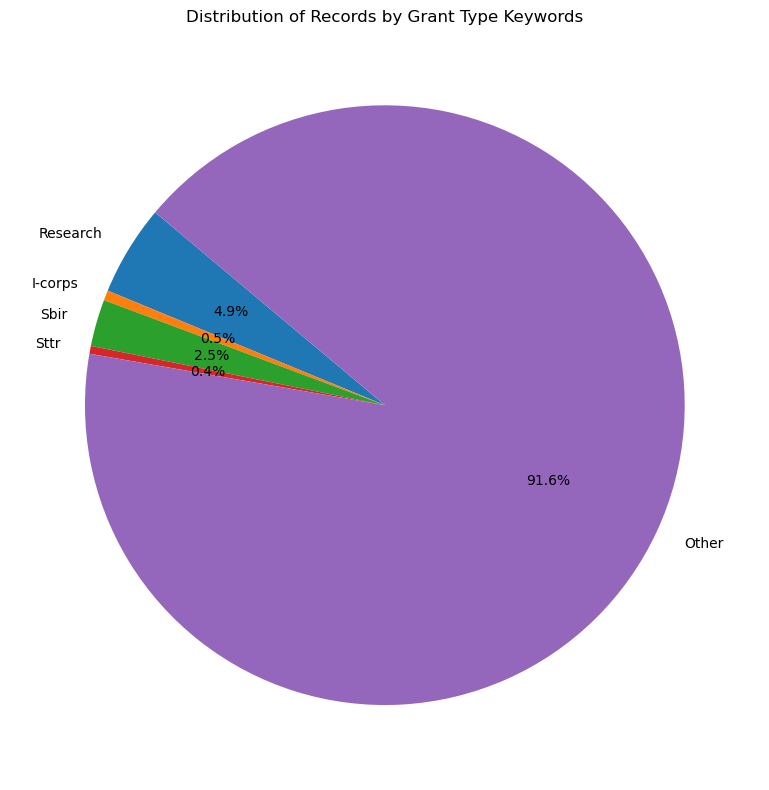

In [22]:
# Plot the counts of each keyword as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(keyword_counts.values(), labels=[k.capitalize() for k in keyword_counts.keys()], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Records by Grant Type Keywords')
plt.tight_layout()
plt.savefig(base/'keyword_counts_pie_chart.png')
plt.show()

In [23]:
# Replace NA values in Investigator_NSFID with -1
consistent_df['Investigator_NSFID'] = consistent_df['Investigator_NSFID'].fillna(-1)

/var/folders/51/gj2tp9pn4klb16gg85jd62zc0000gn/T/ipykernel_2563/2582317073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistent_df['Investigator_NSFID'] = consistent_df['Investigator_NSFID'].fillna(-1)


In [24]:
# Analyze transitions from one grant type to another
# Group by Investigator_NSFID and aggregate the GrantTypes
grant_summary = consistent_df.groupby('Investigator_NSFID')['ProgramElement1_Text'].apply(lambda x: ','.join(sorted(set(x))))

# Initialize a dictionary to count all transitions
all_transitions = {}

# Identify all possible transitions between grant types
grant_types = ['research', 'i-corps', 'sbir', 'sttr', 'other']

for gt1 in grant_types:
    for gt2 in grant_types:
        if gt1 != gt2:
            transition_key = f"{gt1}_to_{gt2}"
            all_transitions[transition_key] = grant_summary[grant_summary.str.contains(gt1) & grant_summary.str.contains(gt2)]

# Save the transition details to CSV files and print them
for transition, investigators in all_transitions.items():
    transition_df = consistent_df[consistent_df['Investigator_NSFID'].isin(investigators.index)]
    transition_df.to_csv(base/f'{transition}.csv', index=False)
    print(f"\nDetails of {transition}:")
    print(transition_df)


Details of research_to_i-corps:
         AwardID  InvestigatorNumber   AwardInstrument  \
99       1307831                   1    Standard Grant   
103      1357551                   1    Standard Grant   
140      1319602                   1  Continuing Grant   
202      1342028                   1    Standard Grant   
218      1357419                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
99                         UNIVERSITY OF CALIFORNIA, DAVIS     Grant   
103               TEXAS A&M ENGINEERING EXPERIMENT STATION     Grant   
140                              MICHIGAN STATE UNIVER


Details of research_to_sbir:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
895      1335466                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1841     1321006                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
895                               UNIVERSITY OF WASHINGTON     Grant   
1410                                                   Na


Details of research_to_sttr:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
548      1346515                   1    Standard Grant   
549      1306131                   1    Standard Grant   
613      1338154                   1    Standard Grant   
660      1358111                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
548                                                    NaN     Grant   
549              THE REGENTS OF THE UNIVERSITY OF COLORAD


Details of research_to_other:
         AwardID  InvestigatorNumber   AwardInstrument  \
172      1321410                   1    Standard Grant   
235      1313529                   1  Continuing Grant   
292      1323429                   1  Fellowship Award   
635      1322859                   1    Standard Grant   
989      1304917                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
172                        UNIVERSITY OF CALIFORNIA, DAVIS     Grant   
235         QUALITY EDUCATION FOR MINORITIES NETWORK (INC)     Grant   
292                                                    N


Details of i-corps_to_research:
         AwardID  InvestigatorNumber   AwardInstrument  \
99       1307831                   1    Standard Grant   
103      1357551                   1    Standard Grant   
140      1319602                   1  Continuing Grant   
202      1342028                   1    Standard Grant   
218      1357419                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
99                         UNIVERSITY OF CALIFORNIA, DAVIS     Grant   
103               TEXAS A&M ENGINEERING EXPERIMENT STATION     Grant   
140                              MICHIGAN STATE UNIVER


Details of i-corps_to_sbir:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1841     1321006                   1    Standard Grant   
1930     1323837                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1410                                                   NaN     Grant   
1769                                                   NaN


Details of i-corps_to_sttr:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1186     1357625                   1    Standard Grant   
1314     1359581                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1186        UNIVERSITY OF NORTH CAROLINA AT CHARLOTTE, THE     Grant   
1314                    TENNESSEE TECHNOLOGICAL UNIVERSITY


Details of i-corps_to_other:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
989      1304917                   1    Standard Grant   
1072     1340364                   1    Standard Grant   
1329     1337502                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
989                                   UNIVERSITY OF HAWAII     Grant   
1072                                  UNIVERSITY OF HAWAI


Details of sbir_to_research:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
895      1335466                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1841     1321006                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
895                               UNIVERSITY OF WASHINGTON     Grant   
1410                                                   Na


Details of sbir_to_i-corps:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1841     1321006                   1    Standard Grant   
1930     1323837                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1410                                                   NaN     Grant   
1769                                                   NaN


Details of sbir_to_sttr:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
310      1301461                   1  Continuing Grant   
492      1329663                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
1463     1315562                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
310                                   UNIVERSITY OF OREGON     Grant   
492                                                    NaN   


Details of sbir_to_other:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1930     1323837                   1  Fellowship Award   
2652     1323820                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1410                                                   NaN     Grant   
1769                                                   NaN  


Details of sttr_to_research:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
548      1346515                   1    Standard Grant   
549      1306131                   1    Standard Grant   
613      1338154                   1    Standard Grant   
660      1358111                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
548                                                    NaN     Grant   
549              THE REGENTS OF THE UNIVERSITY OF COLORAD


Details of sttr_to_i-corps:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1186     1357625                   1    Standard Grant   
1314     1359581                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1186        UNIVERSITY OF NORTH CAROLINA AT CHARLOTTE, THE     Grant   
1314                    TENNESSEE TECHNOLOGICAL UNIVERSITY


Details of sttr_to_sbir:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
310      1301461                   1  Continuing Grant   
492      1329663                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
1463     1315562                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
310                                   UNIVERSITY OF OREGON     Grant   
492                                                    NaN   


Details of sttr_to_other:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1930     1323837                   1  Fellowship Award   
2652     1323820                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1410                                                   NaN     Grant   
1769                                                   NaN  


Details of other_to_research:
         AwardID  InvestigatorNumber   AwardInstrument  \
172      1321410                   1    Standard Grant   
235      1313529                   1  Continuing Grant   
292      1323429                   1  Fellowship Award   
635      1322859                   1    Standard Grant   
989      1304917                   1    Standard Grant   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
172                        UNIVERSITY OF CALIFORNIA, DAVIS     Grant   
235         QUALITY EDUCATION FOR MINORITIES NETWORK (INC)     Grant   
292                                                    N


Details of other_to_i-corps:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
989      1304917                   1    Standard Grant   
1072     1340364                   1    Standard Grant   
1329     1337502                   1    Standard Grant   
1410     1323991                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
989                                   UNIVERSITY OF HAWAII     Grant   
1072                                  UNIVERSITY OF HAWAI


Details of other_to_sbir:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1930     1323837                   1  Fellowship Award   
2652     1323820                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1410                                                   NaN     Grant   
1769                                                   NaN  


Details of other_to_sttr:
         AwardID  InvestigatorNumber   AwardInstrument  \
292      1323429                   1  Fellowship Award   
1410     1323991                   1  Fellowship Award   
1769     1323822                   1  Fellowship Award   
1930     1323837                   1  Fellowship Award   
2652     1323820                   1  Fellowship Award   
...          ...                 ...               ...   
1889707   412370                   3    Standard Grant   
1889708   421962                   3    Standard Grant   
1889709   408328                   3    Standard Grant   
1889710   406305                   3    Standard Grant   
1889711   411679                   3        Fellowship   

                                 Institution_OrgLglBusName TRAN_TYPE  \
292                                                    NaN     Grant   
1410                                                   NaN     Grant   
1769                                                   NaN  

In [25]:
# Calculate the total number of transitions for each category
transition_counts = {k: len(v) for k, v in all_transitions.items()}

# Print the total number of transitions for each category
print("\nTotal Number of Transitions:")
for transition, count in transition_counts.items():
    print(f"{transition}: {count}")


Total Number of Transitions:
research_to_i-corps: 665
research_to_sbir: 195
research_to_sttr: 232
research_to_other: 317
i-corps_to_research: 665
i-corps_to_sbir: 45
i-corps_to_sttr: 117
i-corps_to_other: 12
sbir_to_research: 195
sbir_to_i-corps: 45
sbir_to_sttr: 760
sbir_to_other: 20
sttr_to_research: 232
sttr_to_i-corps: 117
sttr_to_sbir: 760
sttr_to_other: 10
other_to_research: 317
other_to_i-corps: 12
other_to_sbir: 20
other_to_sttr: 10


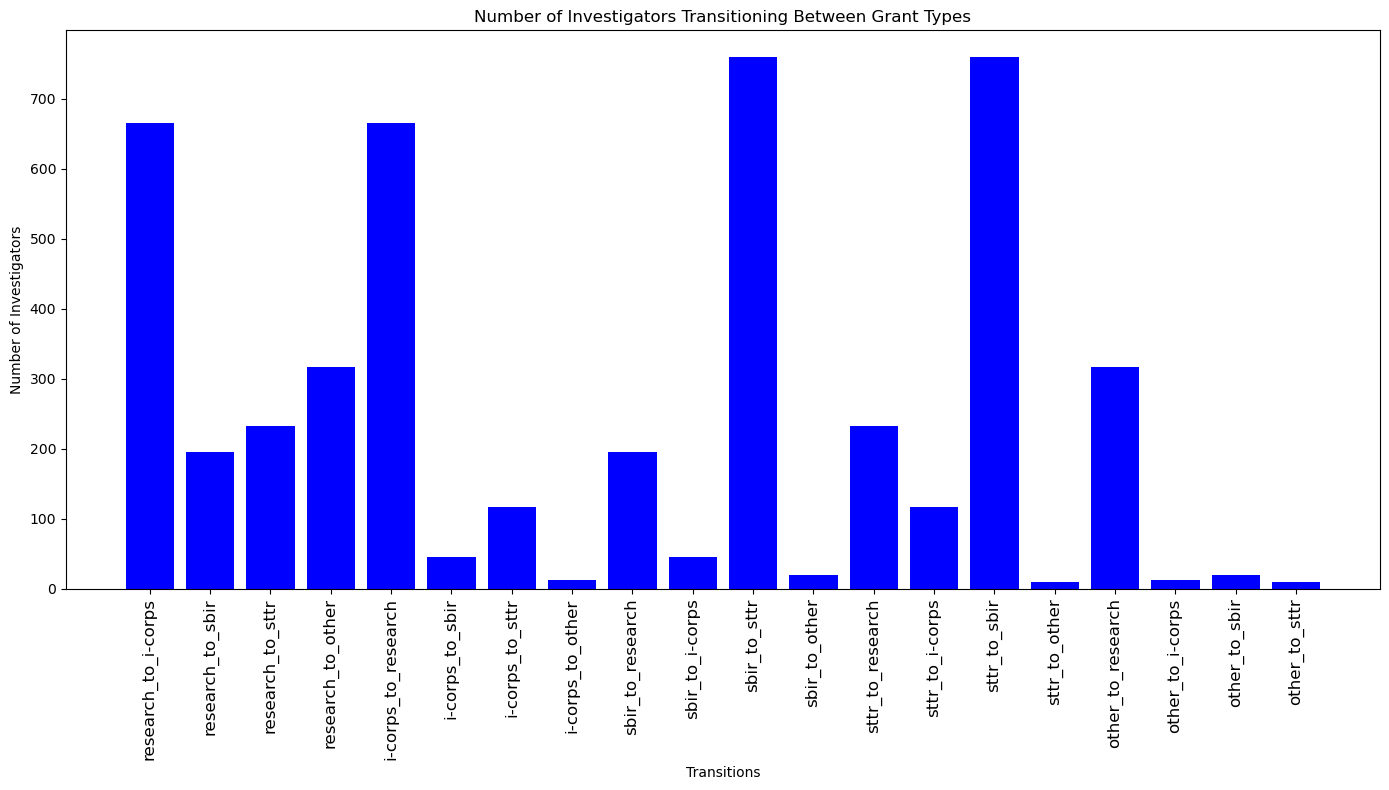

In [26]:
# Plot the transitions with improved x-axis readability
plt.figure(figsize=(14, 8))
plt.bar(transition_counts.keys(), transition_counts.values(), color='blue')
plt.xlabel('Transitions')
plt.ylabel('Number of Investigators')
plt.title('Number of Investigators Transitioning Between Grant Types')
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels by 90 degrees and set font size to 12
plt.tight_layout()
plt.savefig(base/'grant_type_transitions.png')
plt.show()